# Data Pre-Processing
## Import Packages and CSV

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns", None)


In [3]:
# Create Dataframe
df = pd.read_csv(r"mushrooms.csv")
# Print shape of dataset
print(df.shape)

(8124, 23)


## Data Cleaning
#### Handling Missing values

- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset



### 3.1 Check Null Values


In [4]:
##these are the features with nan value
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')
    

In [5]:
features_with_na

[]

- There are no null values in the dataset

### 3.2 Other Data Cleaning steps
Handling Duplicates

In [6]:
df.duplicated().sum()

0

- No Duplicates in the dataset

## Feature Engineering
#### Feature Extraction

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### Type of Features
All features are categorical 

In [8]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 23


## Split X and Y

- Split Dataframe to X and y
- Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “class” column.



In [9]:
X = df.drop('class', axis=1)
y = df['class']

In [10]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Manual encoding target column

In [11]:
# If the target column has Poisonous(p) it is encoded as 1 others as 0
y= np.where(y=='p', 1,0)


In [12]:
y 

array([1, 0, 0, ..., 0, 1, 0])

## Feature Encoding and Scaling
- use ordinal-encoding or label-encoding or one-hot-encoding

In [13]:
df['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [14]:
df['cap-shape'].value_counts(normalize=True) # Provide proportions

cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: proportion, dtype: float64

In [15]:
df.groupby('spore-print-color')['class'].value_counts(normalize=True).to_frame()*100


proportion
spore-print-color class            
b                 e      100.000000
h                 p       97.058824
                  e        2.941176
k                 e       88.034188
                  p       11.965812
n                 e       88.617886
                  p       11.382114
o                 e      100.000000
r                 p      100.000000
u                 e      100.000000
w                 p       75.879397
                  e       24.120603
y                 e      100.000000

## Preprocessing using Column Transformer

In [16]:
# Create Column Transformer with one types of transformers
or_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat']



In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [18]:
ordinal_encoder = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
    ]
)


- `LabelEncoder` is designed to work only on `1D arrays` (labels) — not on 2D tabular data or multi-columns. It's for encoding the target (like y), not input features (X).

- So throws an error during `fit_transform()` because LabelEncoder doesn’t accept the input shape or arguments that ColumnTransformer provides.

In [19]:
X = preprocessor.fit_transform(X)


In [20]:
X

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

### Use SMOTE if data is imbalance
<code>
from imblearn.combine import SMOTETomek, SMOTEENN

<h7>### Resampling the minority class. The strategy can be changed as required.</h7>

smt = SMOTEENN(random_state=42,sampling_strategy='minority' )

<h7>### Fit the model to generate the data.</h7>

X_res, y_res = smt.fit_resample(X, y)

</code>

## Train Test Split

- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.



In [21]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6499, 22), (1625, 22))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

from xgboost import XGBClassifier

In [23]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc


In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(), 
}

In [25]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''

    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)

        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report
    

## Model Training


In [26]:
base_model_report = evaluate_models(X = X, y = y, models = models)


Logistic Regression
Model performance for Training set
- Accuracy: 0.9523
- F1 score: 0.9502
- Precision: 0.9576
- Recall: 0.9429
- Roc Auc Score: 0.9520
----------------------------------
Model performance for Test set
- Accuracy: 0.9465
- F1 score: 0.9445
- Precision: 0.9427
- Recall: 0.9463
- Roc Auc Score: 0.9465


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.9898
- F1 score: 0.9894
- Precision: 0.9987
- Recall: 0.9802
- Roc Auc Score: 0.9895
----------------------------------
Model performance for Test set
- Accuracy: 0.9926
- F1 score: 0.9923
- Precision: 0.9987
- Recall: 0.9859
- Roc Auc Score: 0.9924


K-Neighbors Classifier
Model performa

- Almost all of the model perform very well but i will be using Random Forest.

### Results of All Models

In [27]:
base_model_report

,Model Name,Accuracy
1,Decision Tree,1.000000
4,Random Forest,1.000000
5,Gradient Boosting,1.000000
6,XGBClassifier,1.000000
3,K-Neighbors Classifier,0.995077
2,Support Vector Classifier,0.992615
0,Logistic Regression,0.946462


In [33]:
best_model = RandomForestClassifier()
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)


FINAL MODEL 'KNN'
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



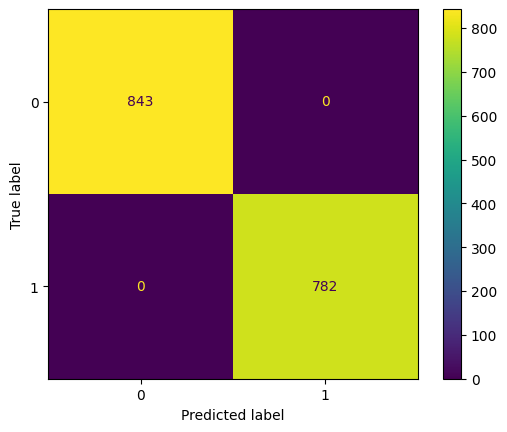

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
